# Regression Model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sklearn
from sklearn.impute import SimpleImputer
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn import linear_model
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [2]:
df=pd.read_csv("Election.csv")
df

,TimeElapsed,time,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,...,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
0,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.50,8874,...,52.66,813743,428546,PS,0,38.29,40.22,147993,94,106
1,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.50,8874,...,52.66,813743,428546,PPD/PSD,0,33.28,34.95,128624,81,77
2,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.50,8874,...,52.66,813743,428546,B.E.,0,6.81,7.15,26307,16,19
3,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.50,8874,...,52.66,813743,428546,CDS-PP,0,4.90,5.14,18923,12,5
4,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.50,8874,...,52.66,813743,428546,PCP-PEV,0,4.59,4.83,17757,11,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21638,265,2019-10-07 00:35:01,Viseu,8,0,277,277,4995,2.81,3700,...,51.28,371931,190712,NC,0,0.19,0.20,332,0,0
21639,265,2019-10-07 00:35:01,Viseu,8,0,277,277,4995,2.81,3700,...,51.28,371931,190712,PNR,0,0.18,0.19,326,0,0
21640,265,2019-10-07 00:35:01,Viseu,8,0,277,277,4995,2.81,3700,...,51.28,371931,190712,MPT,0,0.14,0.15,256,0,0
21641,265,2019-10-07 00:35:01,Viseu,8,0,277,277,4995,2.81,3700,...,51.28,371931,190712,PTP,0,0.13,0.14,239,0,0


# EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21643 entries, 0 to 21642
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   TimeElapsed               21643 non-null  int64  
 1   time                      21643 non-null  object 
 2   territoryName             21643 non-null  object 
 3   totalMandates             21643 non-null  int64  
 4   availableMandates         21643 non-null  int64  
 5   numParishes               21643 non-null  int64  
 6   numParishesApproved       21643 non-null  int64  
 7   blankVotes                21643 non-null  int64  
 8   blankVotesPercentage      21643 non-null  float64
 9   nullVotes                 21643 non-null  int64  
 10  nullVotesPercentage       21643 non-null  float64
 11  votersPercentage          21643 non-null  float64
 12  subscribedVoters          21643 non-null  int64  
 13  totalVoters               21643 non-null  int64  
 14  pre.bl

In [4]:
df.isnull().sum()

TimeElapsed                 0
time                        0
territoryName               0
totalMandates               0
availableMandates           0
numParishes                 0
numParishesApproved         0
blankVotes                  0
blankVotesPercentage        0
nullVotes                   0
nullVotesPercentage         0
votersPercentage            0
subscribedVoters            0
totalVoters                 0
pre.blankVotes              0
pre.blankVotesPercentage    0
pre.nullVotes               0
pre.nullVotesPercentage     0
pre.votersPercentage        0
pre.subscribedVoters        0
pre.totalVoters             0
Party                       0
Mandates                    0
Percentage                  0
validVotesPercentage        0
Votes                       0
Hondt                       0
FinalMandates               0
dtype: int64

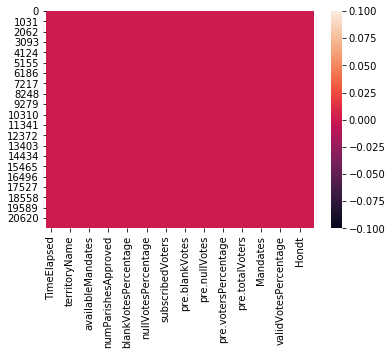

In [5]:
sns.heatmap(df.isnull())
plt.show()

In [6]:
df.corr()

,TimeElapsed,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,nullVotesPercentage,votersPercentage,...,pre.nullVotesPercentage,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
TimeElapsed,1.000000,0.260377,-0.261627,-0.001944,0.100432,0.192350,0.034343,0.185784,-0.225021,0.029698,...,-0.106054,0.054761,0.193160,0.196667,0.090190,0.000767,0.000526,0.082417,-0.001100,-0.001007
totalMandates,0.260377,1.000000,0.217404,0.765877,0.873415,0.969988,-0.003149,0.967294,-0.165132,0.171317,...,-0.132143,0.151927,0.972976,0.975404,0.336989,-0.010171,-0.010474,0.395617,0.288420,0.264117
availableMandates,-0.261627,0.217404,1.000000,0.745472,0.562719,0.390638,-0.002806,0.407366,0.029915,0.112293,...,-0.044174,0.080524,0.391272,0.383089,0.072320,-0.011083,-0.011052,0.152348,0.291310,0.266764
numParishes,-0.001944,0.765877,0.745472,1.000000,0.954092,0.861279,0.032013,0.870240,0.013209,0.073855,...,-0.058017,0.026407,0.860782,0.853779,0.257365,-0.010770,-0.010624,0.343593,0.359283,0.329009
numParishesApproved,0.100432,0.873415,0.562719,0.954092,1.000000,0.951265,0.035153,0.956142,-0.037416,0.081157,...,-0.073301,0.042180,0.949110,0.943147,0.293795,-0.009840,-0.009767,0.380311,0.340901,0.312177
blankVotes,0.192350,0.969988,0.390638,0.861279,0.951265,1.000000,0.038503,0.998781,-0.150894,0.183970,...,-0.150275,0.161642,0.998487,0.998178,0.326630,-0.011883,-0.012002,0.404003,0.322780,0.295583
blankVotesPercentage,0.034343,-0.003149,-0.002806,0.032013,0.035153,0.038503,1.000000,0.006615,0.094047,-0.190778,...,-0.307544,-0.105314,0.002821,-0.000069,-0.000926,-0.006258,-0.002076,-0.001486,-0.001305,-0.001195
nullVotes,0.185784,0.967294,0.407366,0.870240,0.956142,0.998781,0.006615,1.000000,-0.136296,0.181411,...,-0.125639,0.154965,0.999296,0.998706,0.325711,-0.011602,-0.011820,0.404195,0.326144,0.298663
nullVotesPercentage,-0.225021,-0.165132,0.029915,0.013209,-0.037416,-0.150894,0.094047,-0.136296,1.000000,-0.108855,...,0.497749,-0.233688,-0.153891,-0.159566,-0.056254,0.003301,0.005441,-0.066526,-0.032388,-0.029659
votersPercentage,0.029698,0.171317,0.112293,0.073855,0.081157,0.183970,-0.190778,0.181411,-0.108855,1.000000,...,-0.278275,0.909825,0.172542,0.186834,0.056553,-0.019836,-0.020966,0.076377,0.066665,0.061048


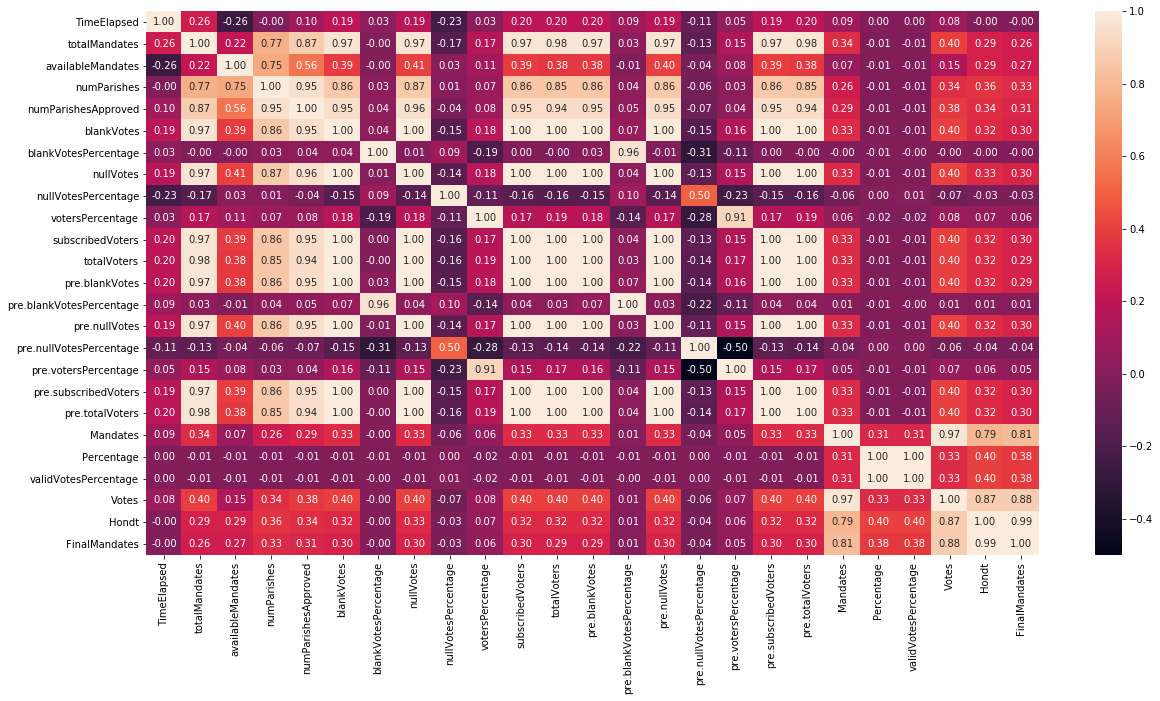

In [7]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, fmt='.2f')
plt.show()

In [8]:
# Dropping columns from correlation heatmap with multiple observations of high correlation coefficients(>0.90) to avoid multicollinearity
df.drop(['totalMandates','numParishesApproved','blankVotes','nullVotes','subscribedVoters','totalVoters','pre.blankVotes','pre.nullVotes','pre.subscribedVoters','pre.totalVoters','Percentage','Mandates','pre.blankVotesPercentage','pre.votersPercentage'],axis=1,inplace=True)

In [9]:
cf=[]
nf=[] 
for fea in df.columns:
    if df[fea].dtype == 'O':
            cf.append(fea)
    else:
            nf.append(fea)
print(cf)
print('\n',nf)

['time', 'territoryName', 'Party']

 ['TimeElapsed', 'availableMandates', 'numParishes', 'blankVotesPercentage', 'nullVotesPercentage', 'votersPercentage', 'pre.nullVotesPercentage', 'validVotesPercentage', 'Votes', 'Hondt', 'FinalMandates']


In [10]:
print('No of numerical features: ',len(nf))
print('No of categorical features: ',len(cf))

No of numerical features:  11
No of categorical features:  3


In [11]:
for col in cf:
    print(df[col].value_counts())
    print('no. of unique vales: ',len(df[col].value_counts()),'\n')

2019-10-06 23:50:02    403
2019-10-06 20:45:02    403
2019-10-06 23:55:01    403
2019-10-06 22:00:02    403
2019-10-06 22:50:01    403
2019-10-06 21:35:01    403
2019-10-06 22:25:01    403
2019-10-06 21:00:01    403
2019-10-06 21:05:01    403
2019-10-06 20:55:01    403
2019-10-06 21:10:01    403
2019-10-07 00:15:01    403
2019-10-06 21:40:02    403
2019-10-06 22:35:01    403
2019-10-06 23:35:02    403
2019-10-07 00:05:01    403
2019-10-06 23:20:01    403
2019-10-07 00:25:01    403
2019-10-06 23:40:01    403
2019-10-07 00:20:02    403
2019-10-06 21:55:01    403
2019-10-06 22:45:01    403
2019-10-06 22:30:01    403
2019-10-07 00:00:02    403
2019-10-06 22:55:02    403
2019-10-06 23:45:02    403
2019-10-06 21:15:02    403
2019-10-06 22:10:01    403
2019-10-06 21:20:02    403
2019-10-07 00:10:02    403
2019-10-06 23:05:01    403
2019-10-06 21:30:01    403
2019-10-06 23:10:02    403
2019-10-06 22:15:01    403
2019-10-06 21:25:02    403
2019-10-06 23:25:02    403
2019-10-07 00:30:02    403
2

In [12]:
for col in nf:
    print(col,' : ',df[col].nunique()) 

TimeElapsed  :  54
availableMandates  :  69
numParishes  :  20
blankVotesPercentage  :  146
nullVotesPercentage  :  107
votersPercentage  :  282
pre.nullVotesPercentage  :  90
validVotesPercentage  :  1387
Votes  :  4029
Hondt  :  41
FinalMandates  :  17


# Statistics Summary

In [13]:
df.describe()

,TimeElapsed,availableMandates,numParishes,blankVotesPercentage,nullVotesPercentage,votersPercentage,pre.nullVotesPercentage,validVotesPercentage,Votes,Hondt,FinalMandates
count,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,2.164300e+04,21643.000000,21643.000000
mean,133.146052,11.499284,309.956013,2.621629,1.961471,51.983722,1.777442,5.207232,1.585209e+04,1.126138,1.126138
std,77.651193,31.738783,659.055911,0.795289,0.375250,4.854380,0.388798,10.881108,9.310605e+04,6.293552,6.872644
min,0.000000,0.000000,54.000000,0.530000,1.340000,35.980000,1.140000,0.020000,1.000000e+00,0.000000,0.000000
25%,65.000000,0.000000,75.000000,2.230000,1.720000,50.290000,1.520000,0.230000,2.360000e+02,0.000000,0.000000
50%,135.000000,3.000000,147.000000,2.640000,1.870000,53.130000,1.690000,0.650000,7.900000e+02,0.000000,0.000000
75%,200.000000,9.000000,242.000000,2.980000,2.230000,54.550000,1.970000,3.160000,4.510000e+03,0.000000,0.000000
max,265.000000,226.000000,3092.000000,5.460000,3.350000,59.870000,3.120000,51.420000,1.866407e+06,94.000000,106.000000


In [14]:
df.describe(include = ['O'])

,time,territoryName,Party
count,21643,21643,21643
unique,54,21,21
top,2019-10-06 23:50:02,Porto,PDR
freq,403,1134,1127


In [15]:
df['Time']=pd.DatetimeIndex(df['time']).time

In [16]:
#changing categorial object into numeric form
df['territoryName'] = df['territoryName'].astype('category').cat.codes
df['Party'] = df['Party'].astype('category').cat.codes

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21643 entries, 0 to 21642
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TimeElapsed              21643 non-null  int64  
 1   time                     21643 non-null  object 
 2   territoryName            21643 non-null  int8   
 3   availableMandates        21643 non-null  int64  
 4   numParishes              21643 non-null  int64  
 5   blankVotesPercentage     21643 non-null  float64
 6   nullVotesPercentage      21643 non-null  float64
 7   votersPercentage         21643 non-null  float64
 8   pre.nullVotesPercentage  21643 non-null  float64
 9   Party                    21643 non-null  int8   
 10  validVotesPercentage     21643 non-null  float64
 11  Votes                    21643 non-null  int64  
 12  Hondt                    21643 non-null  int64  
 13  FinalMandates            21643 non-null  int64  
 14  Time                  

In [18]:
df.drop(['time'],axis=1,inplace=True)

In [19]:
df.head()

,TimeElapsed,territoryName,availableMandates,numParishes,blankVotesPercentage,nullVotesPercentage,votersPercentage,pre.nullVotesPercentage,Party,validVotesPercentage,Votes,Hondt,FinalMandates,Time
0,0,16,226,3092,2.5,2.3,51.36,1.91,17,40.22,147993,94,106,20:10:02
1,0,16,226,3092,2.5,2.3,51.36,1.91,15,34.95,128624,81,77,20:10:02
2,0,16,226,3092,2.5,2.3,51.36,1.91,1,7.15,26307,16,19,20:10:02
3,0,16,226,3092,2.5,2.3,51.36,1.91,2,5.14,18923,12,5,20:10:02
4,0,16,226,3092,2.5,2.3,51.36,1.91,11,4.83,17757,11,12,20:10:02


# Data Visualisation

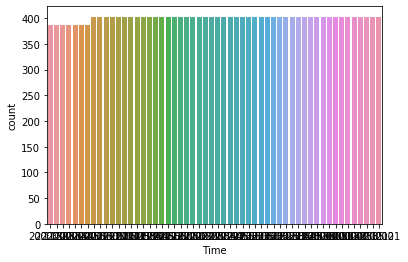

In [20]:
#univarite analysis
sns.countplot(df['Time'])
plt.show()

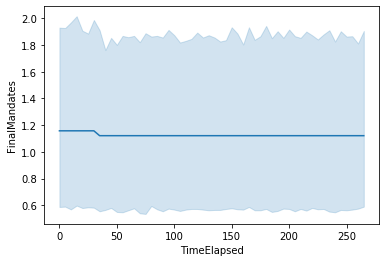

In [22]:
#bivariate analysis
sns.lineplot(x='TimeElapsed',y='FinalMandates',data=df) 
plt.show()

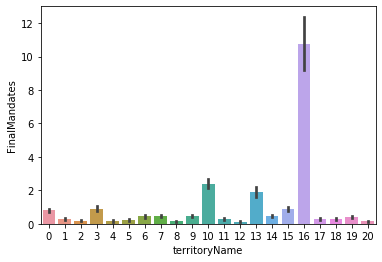

In [23]:
sns.barplot(x='territoryName',y='FinalMandates',data=df) 
plt.show()

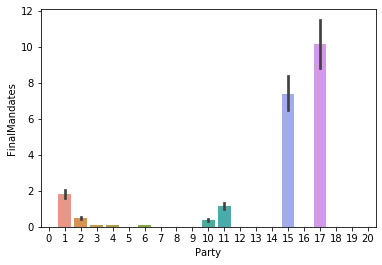

In [24]:
sns.barplot(x='Party',y='FinalMandates',data=df) 
plt.show()

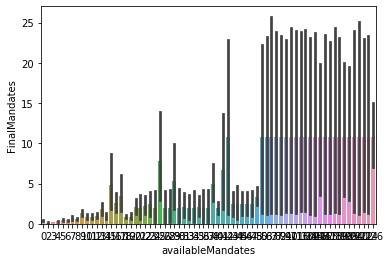

In [25]:
sns.barplot(x='availableMandates',y='FinalMandates',data=df) 
plt.show()

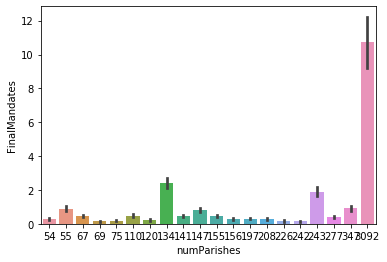

In [26]:
sns.barplot(x='numParishes',y='FinalMandates',data=df) 
plt.show()

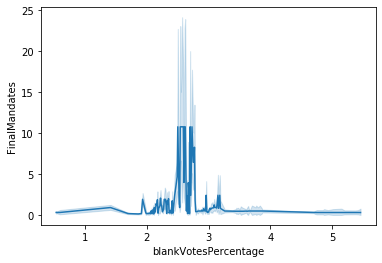

In [27]:
sns.lineplot(x='blankVotesPercentage',y='FinalMandates',data=df) 
plt.show()

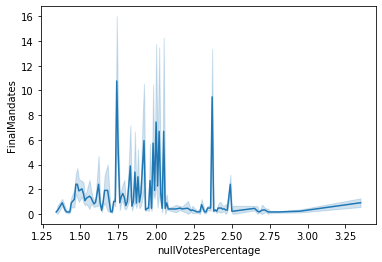

In [28]:
sns.lineplot(x='nullVotesPercentage',y='FinalMandates',data=df) 
plt.show()

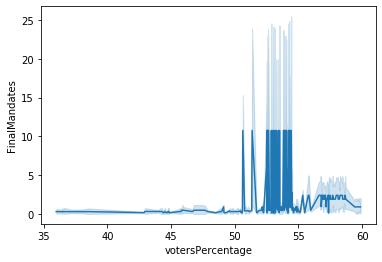

In [29]:
sns.lineplot(x='votersPercentage',y='FinalMandates',data=df) 
plt.show()

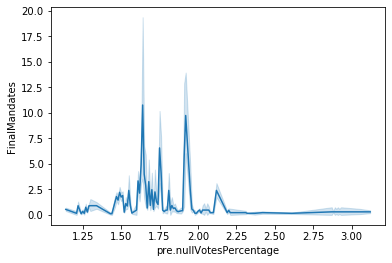

In [30]:
sns.lineplot(x='pre.nullVotesPercentage',y='FinalMandates',data=df) 
plt.show()

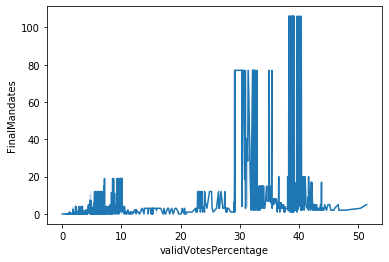

In [31]:
sns.lineplot(x='validVotesPercentage',y='FinalMandates',data=df) 
plt.show()

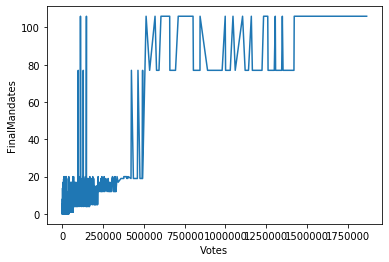

In [32]:
sns.lineplot(x='Votes',y='FinalMandates',data=df) 
plt.show()

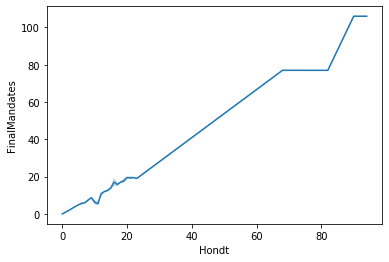

In [33]:
sns.lineplot(x='Hondt',y='FinalMandates',data=df) 
plt.show()

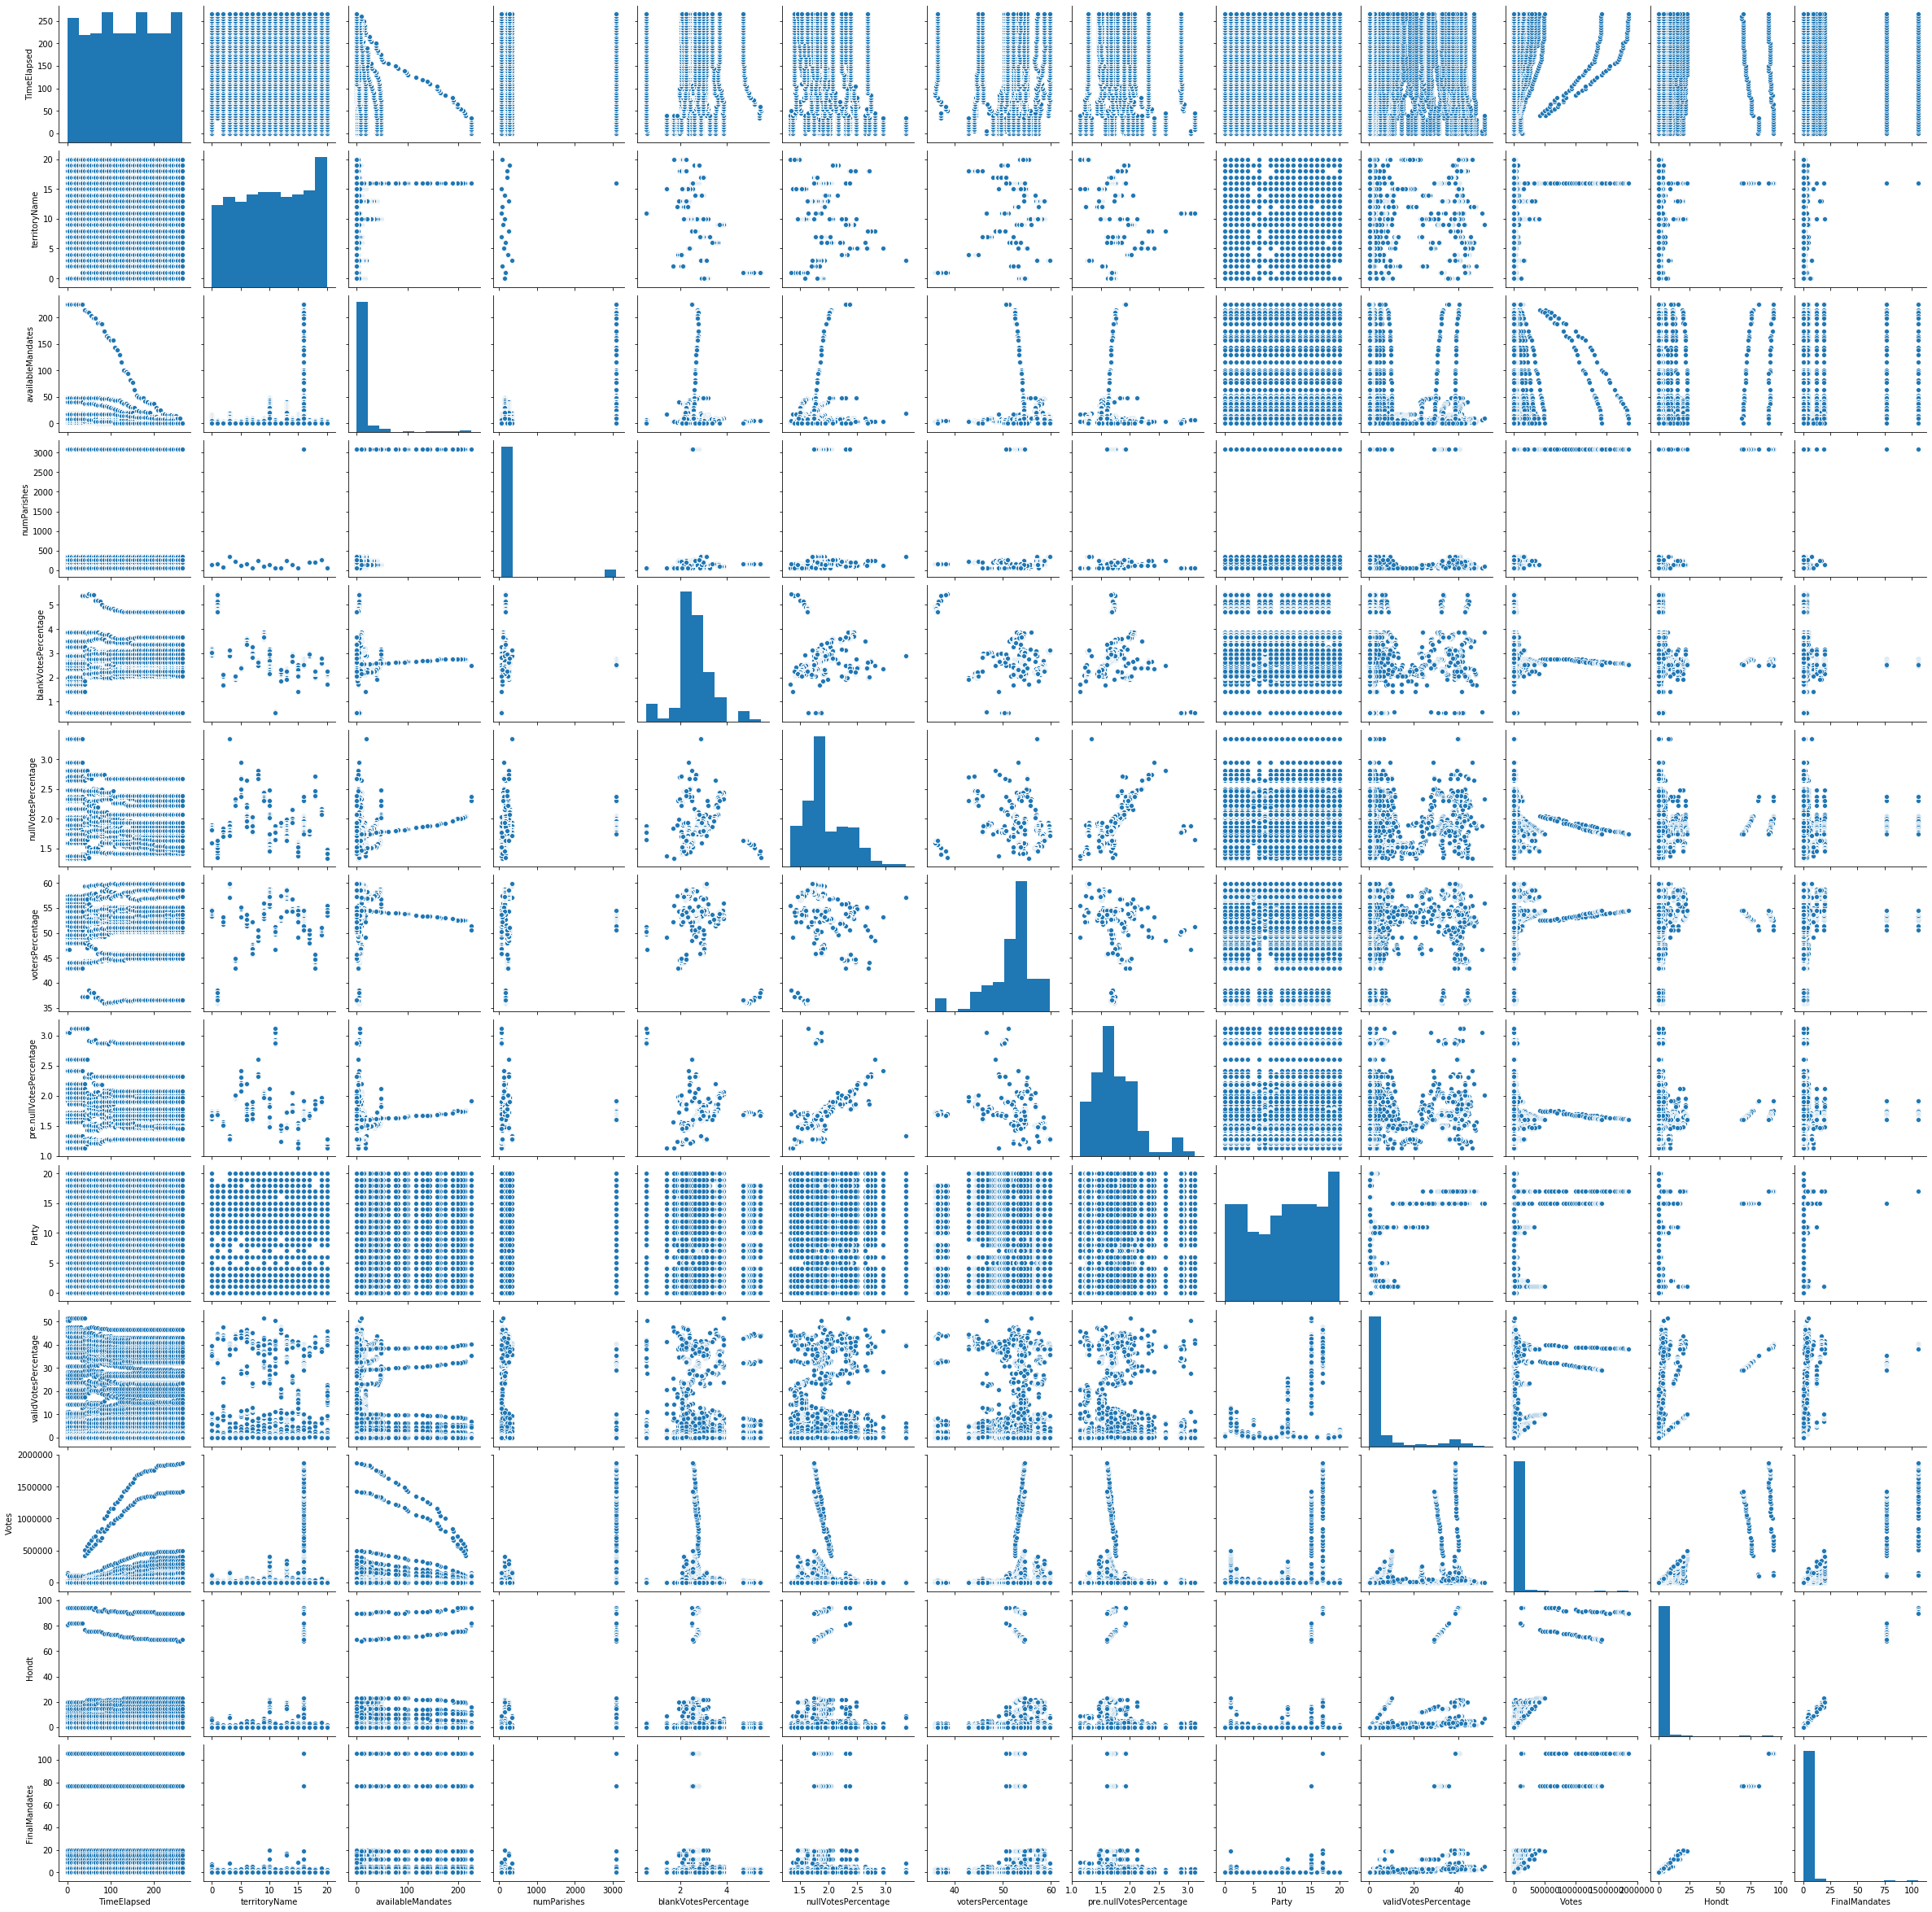

In [34]:
sns.pairplot(df)
plt.show()

In [35]:
#correlation matrix
df.corr()

,TimeElapsed,territoryName,availableMandates,numParishes,blankVotesPercentage,nullVotesPercentage,votersPercentage,pre.nullVotesPercentage,Party,validVotesPercentage,Votes,Hondt,FinalMandates
TimeElapsed,1.000000,-0.012674,-0.261627,-0.001944,0.034343,-0.225021,0.029698,-0.106054,-0.001169,0.000526,0.082417,-0.001100,-0.001007
territoryName,-0.012674,1.000000,0.181563,0.223300,-0.302412,-0.126432,0.104222,-0.083214,0.012263,-0.004874,0.078520,0.084131,0.077042
availableMandates,-0.261627,0.181563,1.000000,0.745472,-0.002806,0.029915,0.112293,-0.044174,-0.001882,-0.011052,0.152348,0.291310,0.266764
numParishes,-0.001944,0.223300,0.745472,1.000000,0.032013,0.013209,0.073855,-0.058017,-0.004013,-0.010624,0.343593,0.359283,0.329009
blankVotesPercentage,0.034343,-0.302412,-0.002806,0.032013,1.000000,0.094047,-0.190778,-0.307544,-0.019692,-0.002076,-0.001486,-0.001305,-0.001195
nullVotesPercentage,-0.225021,-0.126432,0.029915,0.013209,0.094047,1.000000,-0.108855,0.497749,0.007069,0.005441,-0.066526,-0.032388,-0.029659
votersPercentage,0.029698,0.104222,0.112293,0.073855,-0.190778,-0.108855,1.000000,-0.278275,0.014657,-0.020966,0.076377,0.066665,0.061048
pre.nullVotesPercentage,-0.106054,-0.083214,-0.044174,-0.058017,-0.307544,0.497749,-0.278275,1.000000,0.009577,0.000158,-0.057086,-0.042245,-0.038686
Party,-0.001169,0.012263,-0.001882,-0.004013,-0.019692,0.007069,0.014657,0.009577,1.000000,0.232066,0.077322,0.104713,0.105097
validVotesPercentage,0.000526,-0.004874,-0.011052,-0.010624,-0.002076,0.005441,-0.020966,0.000158,0.232066,1.000000,0.327054,0.400857,0.382744


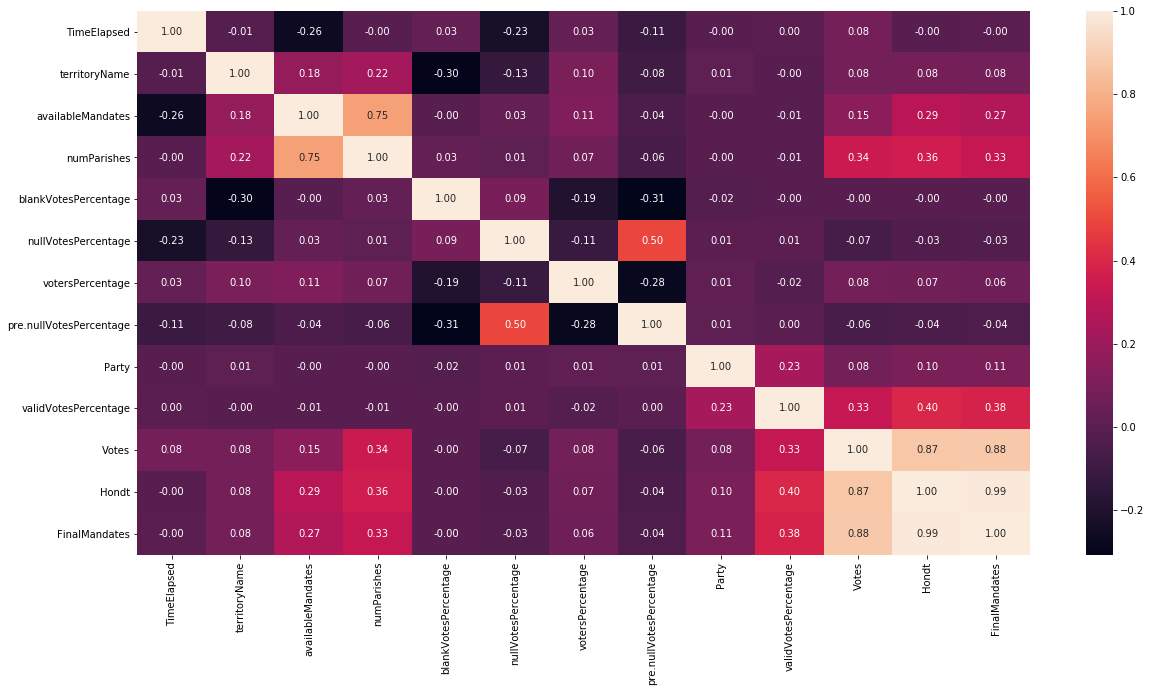

In [36]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, fmt='.2f')
plt.show()

# Data Cleaning

In [37]:
df['Time'] = df['Time'].astype('category').cat.codes

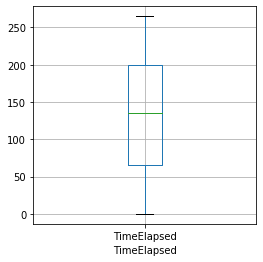

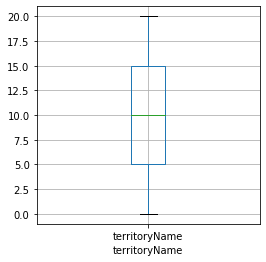

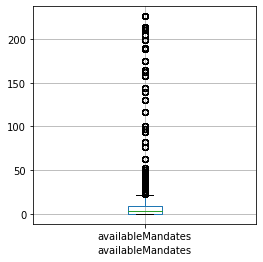

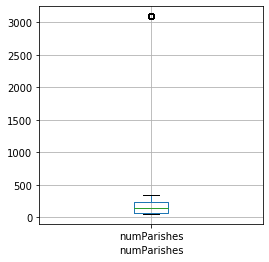

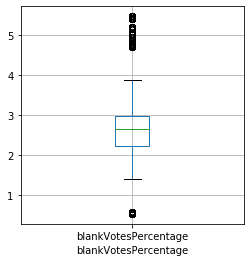

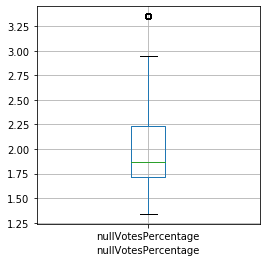

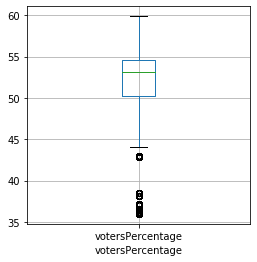

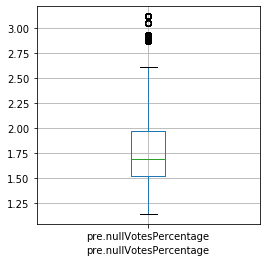

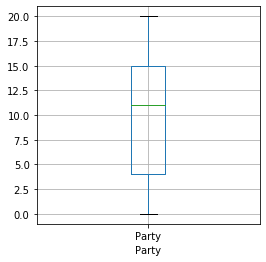

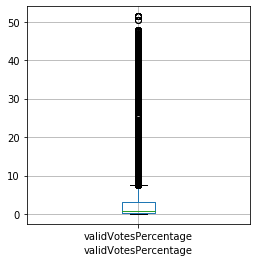

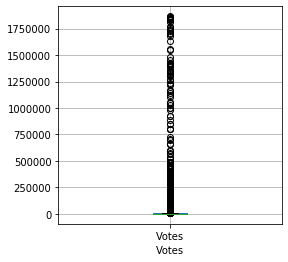

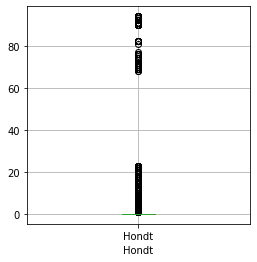

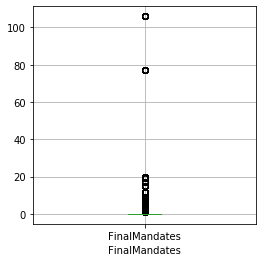

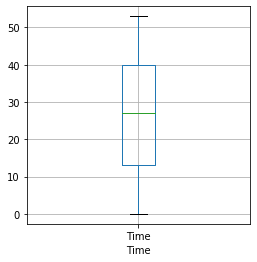

In [38]:
for i in df.columns:
        plt.figure(figsize = (4,4))
        df.boxplot(column=[i])
        plt.xlabel(i)

In [39]:
from scipy.stats import zscore # removing outliers
z=abs(zscore(df))
print(df.shape)
df_final=df.loc[(z<3).all(axis=1)]
print(df_final.shape)
df=df_final

(21643, 14)
(18344, 14)


In [40]:
y=df["FinalMandates"]
dfx=df.drop(columns=['FinalMandates'], axis=1)

In [41]:
dfx.skew()

TimeElapsed               -0.024901
territoryName              0.033275
availableMandates          2.594431
numParishes                0.583743
blankVotesPercentage      -0.843903
nullVotesPercentage        0.565344
votersPercentage          -0.391916
pre.nullVotesPercentage    1.034657
Party                      0.008492
validVotesPercentage       3.367065
Votes                      7.756193
Hondt                      6.962843
Time                      -0.040654
dtype: float64

In [42]:
# handling skewness
from scipy.stats import boxcox
for col in dfx.columns:
    if dfx.skew().loc[col]>0.55:
        dfx[col]=np.log1p(dfx[col])

In [43]:
dfx.skew()

TimeElapsed               -0.024901
territoryName              0.033275
availableMandates          0.504318
numParishes               -0.139357
blankVotesPercentage      -0.843903
nullVotesPercentage        0.330701
votersPercentage          -0.391916
pre.nullVotesPercentage    0.629400
Party                      0.008492
validVotesPercentage       1.548479
Votes                      0.277877
Hondt                      3.497341
Time                      -0.040654
dtype: float64

In [44]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(dfx)
x=pd.DataFrame(x,columns=dfx.columns)
x.head()

,TimeElapsed,territoryName,availableMandates,numParishes,blankVotesPercentage,nullVotesPercentage,votersPercentage,pre.nullVotesPercentage,Party,validVotesPercentage,Votes,Hondt,Time
0,-1.752388,-1.742046,1.36312,0.167754,0.540744,-1.078748,0.184517,-0.335707,1.177506,3.050386,0.516144,4.454409,-1.205361
1,-1.752388,-1.742046,1.36312,0.167754,0.540744,-1.078748,0.184517,-0.335707,-1.435865,1.466657,-0.261689,1.270560,-1.205361
2,-1.752388,-1.742046,1.36312,0.167754,0.540744,-1.078748,0.184517,-0.335707,-1.272529,1.277062,-0.361906,1.270560,-1.205361
3,-1.752388,-1.742046,1.36312,0.167754,0.540744,-1.078748,0.184517,-0.335707,0.197492,0.444856,-0.842336,-0.321365,-1.205361
4,-1.752388,-1.742046,1.36312,0.167754,0.540744,-1.078748,0.184517,-0.335707,0.034156,0.324860,-0.921609,-0.321365,-1.205361


# Model building

In [45]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=42)

In [46]:
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(12290, 13) (6054, 13)
(12290,) (6054,)


In [47]:
maxrscore=0
for r_state in range(42,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=r_state)
    reg=linear_model.LinearRegression()
    reg.fit(x_train,y_train)
    y_pred= reg.predict(x_test)
    r2s=r2_score(y_test,y_pred)
    if r2s > maxrscore:
        maxrscore=r2s
        fr_state=r_state
print("max r2 score corresponding to ",fr_state," is ",maxrscore)

max r2 score corresponding to  94  is  0.8582399945648062


In [48]:
parameter = {'kernel':('linear', 'rbf','poly'), 'C':[1, 10]}
svr = SVR()
grid = GridSearchCV( estimator=SVR(), param_grid = parameter)
grid.fit(x, y)
print(grid)
#print(grid.best_score)
print(grid.best_estimator_.kernel)
print(grid.best_params_)
s=grid.best_estimator_.kernel

GridSearchCV(cv=None, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf', 'poly')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)
poly
{'C': 1, 'kernel': 'poly'}


In [49]:
parameter = {'n_neighbors':(3,5,7,9,11), 'weights':['uniform','distance']}
knn = KNeighborsRegressor()
grid = GridSearchCV( estimator=knn, param_grid = parameter)
grid.fit(x, y)
print(grid)
#print(grid.best_score)
print(grid.best_estimator_.n_neighbors)
print(grid.best_estimator_.weights)
print(grid.best_params_)
k=grid.best_estimator_.n_neighbors
w=grid.best_estimator_.weights

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': (3, 5, 7, 9, 11),
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)
11
distance
{'n_neighbors': 11, 'weights': 'distance'}


In [50]:
KNR=KNeighborsRegressor(n_neighbors=k,weights=w)
SV=SVR(kernel=s)
LR=LinearRegression()
LAR=Lasso()
RR=Ridge()
DT=DecisionTreeRegressor(random_state=fr_state)
RFR=RandomForestRegressor(random_state=fr_state)
ABR=AdaBoostRegressor(random_state=fr_state)
GBR=GradientBoostingRegressor(random_state=fr_state)

In [51]:
models = []
models.append(('KNeighborsRegressor', KNR))
models.append(('SVR', SV))
models.append(('LinearRegression', LR))
models.append(('LassoRegression', LAR))
models.append(('RidgeRegressor', RR))
models.append(('DecisionTreeRegressor', DT))
models.append(('RandomForestRegressor', RFR))
models.append(('AdaBoostRegressor', ABR))
models.append(('GradientBoostingRegressor',GBR))

In [52]:
Model = []
rmse = []
cvs=[]
r2score=[]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=fr_state)
for name,model in models:
    print('***********************',name,'***********************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    y_pred=model.predict(x_test)
    print('\n')
    sc = cross_val_score(model, x, y, cv=10, scoring='r2').mean()
    print('Cross_Val_Score = ',sc)
    cvs.append(sc)
    print('\n')
    print("error:")
    r2s=r2_score(y_test,y_pred)
    print("r2 score is: ",r2s)
    r2score.append(r2s)
    print('\n')
    rmse1=np.sqrt(mean_squared_error(y_test,y_pred))
    print("root Mean squared error: ",rmse1)
    rmse.append(rmse1)
    print('\n')

*********************** KNeighborsRegressor ***********************


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                    weights='distance')


Cross_Val_Score =  0.9939073577408577


error:
r2 score is:  0.990346656277392


root Mean squared error:  0.14311251843383543


*********************** SVR ***********************


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


Cross_Val_Score =  0.9898378411769941


error:
r2 score is:  0.9797685838246702


root Mean squared error:  0.2071819332284392


*********************** LinearRegression ***********************


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


Cross_Val_Score =  0.8430698724128204


error:
r2 score is:  0.8582399945648062


root Mean squared error:  0.548422923831765


*

In [53]:
result = pd.DataFrame({'Model': Model, 'Cross_val_score':cvs,'r2_score':r2score,'root_mean_squared_error':rmse})
result

,Model,Cross_val_score,r2_score,root_mean_squared_error
0,KNeighborsRegressor,0.993907,0.990347,0.143113
1,SVR,0.989838,0.979769,0.207182
2,LinearRegression,0.843070,0.858240,0.548423
3,LassoRegression,0.375472,0.378232,1.148558
4,RidgeRegressor,0.843072,0.858248,0.548408
5,DecisionTreeRegressor,0.997900,0.999611,0.028738
6,RandomForestRegressor,0.998563,0.999657,0.026992
7,AdaBoostRegressor,0.986746,0.985962,0.172579
8,GradientBoostingRegressor,0.996304,0.996816,0.082192


# Saving the best model

In [54]:
from sklearn.externals import joblib

In [55]:
joblib.dump(RFR,'election.pkl')

['election.pkl']

In [56]:
model=joblib.load('election.pkl')

In [57]:
model.predict(x_test.head())

array([0., 0., 0., 0., 0.])